# Sensor readings and time are correlated

## Overview
The analysis in this report aims to demonstrate if there are correlations between time and printers sensor readings.

## Load packages

In [1]:
if (!require("dplyr")) { install.packages("dplyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("ggplot2")) { install.packages("ggplot2", lib='/R/library', repos='http://cran.us.r-project.org') }

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2


## Reading data
This data represents 6 months of sensor data from several printers.

In [2]:
load('IndigoData.dat')
#data$full_time <- as.character(data$full_time)
glimpse(data)

Observations: 1,211,693
Variables: 22
$ event_RowNumber (dbl) 15765585098, 15765585142, 15765585284, 15765585445,...
$ event_press     (int) 45000586, 45000586, 45000586, 45000586, 45000586, 4...
$ Product_Line    (fctr) HP Indigo 7600, HP Indigo 7600, HP Indigo 7600, HP...
$ series          (fctr) 7000 Family Sheet Fed Commercial Press, 7000 Famil...
$ Region          (fctr) North America, North America, North America, North...
$ SubRegion       (fctr) MidAtlantic United States, MidAtlantic United Stat...
$ District        (fctr) UNITED STATES, UNITED STATES, UNITED STATES, UNITE...
$ Ownership       (fctr) DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DI...
$ event_recNum    (int) 739828, 739878, 740037, 740221, 740224, 740554, 740...
$ event_date      (chr) "2016-06-08 00:00:00.000", "2016-06-08 00:00:00.000...
$ event_time      (int) 74703, 75903, 84709, 93603, 95930, 120644, 132213, ...
$ event_name      (fctr) SAMPLE_PIP_AND_IMO_PARAMETERS, SAMPLE_PIP_AND_IMO_...
$ event_state 

## Checking data consistency
Checking if all printers events are SAMPLE_PIP_AND_IMO_PARAMETERS.

In [3]:
data %>% dplyr::summarize(Count = n()) 

,Count
1,1211693


In [4]:
data %>% filter(event_name == "SAMPLE_PIP_AND_IMO_PARAMETERS") %>% dplyr::summarise(Count = n())

,Count
1,1211693


Number of rows is the same for both data

## Checking for daily frequency
Dataframe below results for counting the number of daily events for each printer.

In [5]:
daily_freq <- data %>% 
    #mutate(full_time = substr(full_time,1,10)) %>%
    mutate(dt_event_date = as.POSIXct(event_date)) %>%
    mutate(total_printers = n_distinct(event_press)) %>%
    filter(dt_event_date >= '2016-01-01 00:00:00', dt_event_date <= '2016-01-30 00:00:00') %>%
    group_by(dt_event_date) %>%
    dplyr::summarise(Median=n()/first(total_printers))
head(daily_freq, 10)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[1]]) result is length 2


Source: local data frame [10 x 2]

   dt_event_date     Median
          (time)      (dbl)
1     2016-01-01  0.2130584
2     2016-01-02  1.1786942
3     2016-01-03  1.9770905
4     2016-01-04 10.1970218
5     2016-01-05  9.9644903
6     2016-01-06  9.2485682
7     2016-01-07 10.2107675
8     2016-01-08  8.5624284
9     2016-01-09  1.6666667
10    2016-01-10  1.7605956

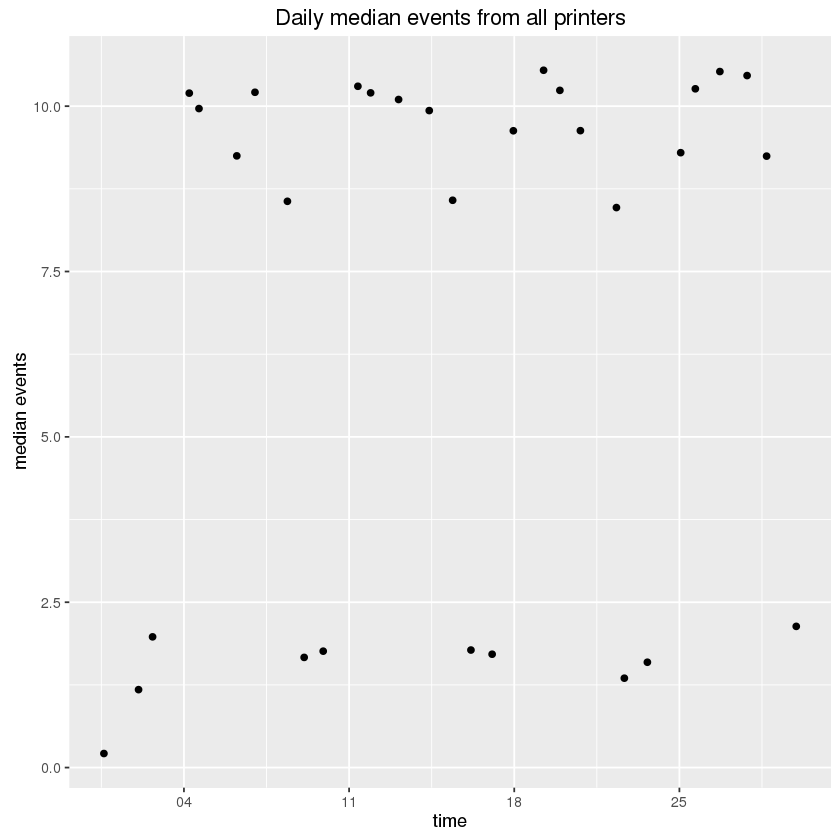

In [6]:
ggplot(daily_freq, aes(x=dt_event_date, y=Median)) +
        ggtitle("Daily median events from all printers") +
        scale_x_datetime(date_labels='%d') +
        xlab("time") + 
        ylab("median events") +
        geom_jitter() 

In [7]:
options()

$add.smooth
[1] TRUE

$bitmapType
[1] "cairo"

$browser
[1] "/usr/bin/firefox"

$browserNLdisabled
[1] FALSE

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$defaultPackages
[1] "datasets"  "utils"     "grDevices" "graphics"  "stats"     "methods"  

$demo.ask
[1] "default"

$deparse.cutoff
[1] 60

$device
function (file = if (onefile) "Rplots.pdf" else "Rplot%03d.pdf", 
    width, height, onefile, family, title, fonts, version, paper, 
    encoding, bg, fg, pointsize, pagecentre, colormodel, useDingbats, 
    useKerning, fillOddEven, compress) 
{
    initPSandPDFfonts()
    new <- list()
    if (!missing(width)) 
        new$width <- width
    if (!missing(height)) 
        new$height <- height
    if (!missing(onefile)) 
        new$onefile <- onefile
    if (!missing(title)) 
        new$title <- title
    if (!missing(fonts)) 
        new$fonts <- fonts
    if (!missing(version)) 
        new$version <- version
    if (!missing(paper)) 
        new$paper <- paper
    if (!missing(encoding)) 
        new$encoding <- encoding
    if (!missing(bg)) 
        new$bg <- bg
    if (!missing(fg)) 
        new$fg <- fg
    if (!missing(pointsize)) 
        new$pointsize <- pointsize
    if (!missing(pagecentre)) 
        new$pagecentre <- pagecentre
    if (!missing(colormodel)) 
        new$colormodel <- colormodel
    if (!missing(useDingbats)) 
        new$useDingbats <- useDingbats
    if (!missing(useKerning)) 
        new$useKerning <- useKerning
    if (!missing(fillOddEven)) 
        new$fillOddEven <- fillOddEven
    if (!missing(compress)) 
        new$compress <- compress
    old <- check.options(new, name.opt = ".PDF.Options", envir = .PSenv)
    if (!missing(family) && (inherits(family, "Type1Font") || 
        inherits(family, "CIDFont"))) {
        enc <- family$encoding
        if (inherits(family, "Type1Font") && !is.null(enc) && 
            enc != "default" && (is.null(old$encoding) || old$encoding == 
            "default")) 
            old$encoding <- enc
        family <- family$metrics
    }
    if (is.null(old$encoding) || old$encoding == "default") 
        old$encoding <- guessEncoding()
    if (!missing(family)) {
        if (length(family) == 4L) {
            family <- c(family, "Symbol.afm")
        }
        else if (length(family) == 5L) {
        }
        else if (length(family) == 1L) {
            pf <- pdfFonts(family)[[1L]]
            if (is.null(pf)) 
                stop(gettextf("unknown family '%s'", family), 
                  domain = NA)
            matchFont(pf, old$encoding)
        }
        else stop("invalid 'family' argument")
        old$family <- family
    }
    version <- old$version
    versions <- c("1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", 
        "2.0")
    if (version %in% versions) 
        version <- as.integer(strsplit(version, "[.]")[[1L]])
    else stop("invalid PDF version")
    onefile <- old$onefile
    if (!checkIntFormat(file)) 
        stop(gettextf("invalid 'file' argument '%s'", file), 
            domain = NA)
    .External(C_PDF, file, old$paper, old$family, old$encoding, 
        old$bg, old$fg, old$width, old$height, old$pointsize, 
        onefile, old$pagecentre, old$title, old$fonts, version[1L], 
        version[2L], old$colormodel, old$useDingbats, old$useKerning, 
        old$fillOddEven, old$compress)
    invisible()
}
<bytecode: 0x1e83760>
<environment: namespace:grDevices>

$device.ask.default
[1] FALSE

$digits
[1] 7

$dplyr.print_max
[1] 20

$dplyr.print_min
[1] 10

$dplyr.show_progress
[1] TRUE

$dplyr.strict_sql
[1] FALSE

$dvipscmd
[1] "dvips"

$echo
[1] FALSE

$editor
[1] "vi"

$encoding
[1] "native.enc"

$example.ask
[1] "default"

$expressions
[1] 5000

$help.search.types
[1] "vignette" "demo"     "help"    

$help.try.all.packages
[1] FALSE

$HTTPUserAgent
[1] "R (3.3.1 x86_64-pc-linux-gnu x86_